<a href="https://colab.research.google.com/github/sambhajizambre/Project/blob/main/capstone%20project2%20multilabel%20cuisine%20classification%20rough4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 5.2 MB/s 
     |████████████████████████████████| 578.0 MB 13 kB/s 
     |████████████████████████████████| 1.7 MB 48.9 MB/s 
     |████████████████████████████████| 438 kB 47.2 MB/s 
     |████████████████████████████████| 5.9 MB 45.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninsta

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import OrderedDict
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow_hub import KerasLayer

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, hamming_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pickle
import time
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
import tensorflow_text as text

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df=pd.read_csv('/content/drive/MyDrive/python/Datafiniti_Fast_Food_Restaurants_May19.csv')

In [28]:
df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd7U0T_7pvs4fz-fS_,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,us/al/bessemer/1803carolinaave/785498836,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL,http://www.yellowpages.com/bessemer-al/mip/chu...,http://www.churchs.com
9996,AV1XW1fF3D1zeR_xFKHL,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,us/nc/raleigh/8511cantileverwayste105/-1596320866,35.884500,-78.737541,Luxury Box,27613-6996,NC,https://www.bbb.org/us/nc/raleigh/profile/spor...,"http://www.theluxuryboxofraleigh.com,http://th..."
9997,AV5UVbkiRxPSIh2RiQxV,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,us/wi/plover/2601ploverrd/-1161002137,44.453180,-89.543170,McDonald's,54467,WI,https://www.yellowpages.com/plover-wi/mip/mcdo...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9998,AVwc9BxYByjofQCxj_GW,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,us/tn/hendersonville/170emainst/-66712705,36.308262,-86.607339,Pizza Hut,37075,TN,https://foursquare.com/v/pizza-hut/4c5fffd43a3...,http://www.pizzahut.com


In [29]:
df.shape

(10000, 16)

In [30]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [31]:
df.tail()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
9995,AVwd7U0T_7pvs4fz-fS_,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,us/al/bessemer/1803carolinaave/785498836,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL,http://www.yellowpages.com/bessemer-al/mip/chu...,http://www.churchs.com
9996,AV1XW1fF3D1zeR_xFKHL,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,us/nc/raleigh/8511cantileverwayste105/-1596320866,35.884500,-78.737541,Luxury Box,27613-6996,NC,https://www.bbb.org/us/nc/raleigh/profile/spor...,"http://www.theluxuryboxofraleigh.com,http://th..."
9997,AV5UVbkiRxPSIh2RiQxV,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,us/wi/plover/2601ploverrd/-1161002137,44.453180,-89.543170,McDonald's,54467,WI,https://www.yellowpages.com/plover-wi/mip/mcdo...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9998,AVwc9BxYByjofQCxj_GW,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,us/tn/hendersonville/170emainst/-66712705,36.308262,-86.607339,Pizza Hut,37075,TN,https://foursquare.com/v/pizza-hut/4c5fffd43a3...,http://www.pizzahut.com
9999,AVzA_GF53D1zeR_xBDVW,2017-06-19T15:33:04Z,2018-12-01T00:03:40Z,3400 Westgate Drive,"Fast Food Restaurant,Restaurants",Accommodation & Food Services,Durham,US,us/nc/durham/3400westgatedrive/-2061630068,35.965869,-78.963366,Burger King,27707-2696,NC,https://foursquare.com/v/burger-king/4c4b28765...,http://www.bk.com


In [32]:
df.describe()

,latitude,longitude
count,10000.000000,10000.000000
mean,37.298215,-93.284547
std,5.566995,16.421424
min,19.639560,-159.464310
25%,33.850652,-98.342758
50%,37.490189,-86.677452
75%,40.808905,-81.803061
max,64.856880,-71.082180


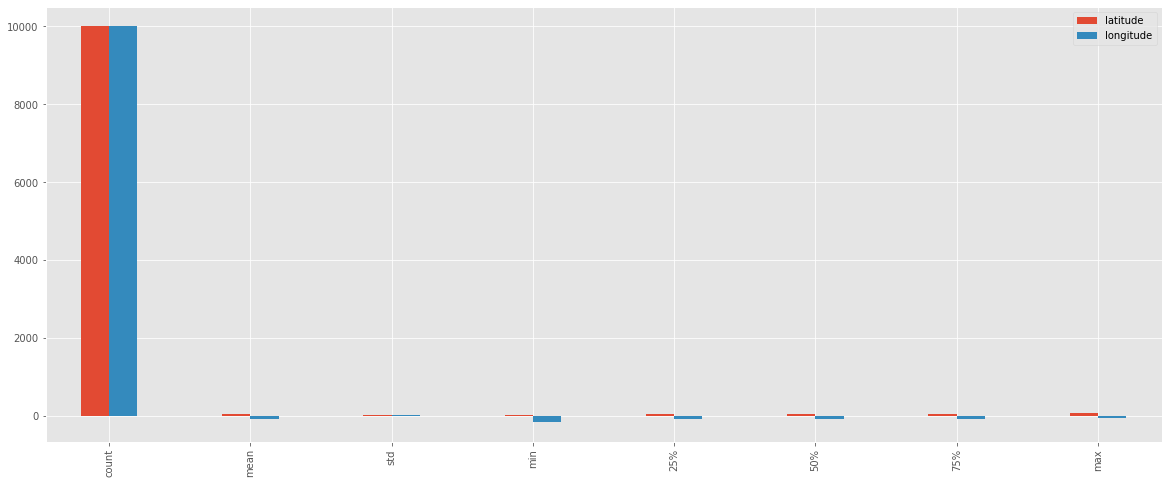

In [33]:
df.describe().plot(kind='bar',figsize=(20,8),width=(0.4))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

In [35]:
df.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
sourceURLs            0
websites             82
dtype: int64

In [36]:
# Store all the cuisines in a list
cuisine_list = []
for cuisines in df['categories']:
  for cuisine in cuisines.split(','):
    cuisine_list.append(cuisine.lower())

In [37]:
# Convert into set for only uniques values
cuisine_set = set(cuisine_list)
print("Total number of cuisines in the data is {}".format(len(cuisine_set)))
print()

Total number of cuisines in the data is 1561



In [38]:
# Convert the list into array for visualising the occurence of each cuisine
cuisine_array = np.asarray(cuisine_list)
cuisine_array

array(['fast food restaurants', 'hamburgers and hot dogs', 'restaurants',
       ..., 'pizza place', 'fast food restaurant', 'restaurants'],
      dtype='<U71')

In [39]:
# Plot the bar chart
labels = np.unique(cuisine_array, return_counts=True)[0]
values = np.unique(cuisine_array, return_counts=True)[1]

In [40]:
# Create a dictionary of the cuisine and its count
cuisine_count = {}
for cuisine, count in zip(labels, values):
  cuisine_count[cuisine] = count

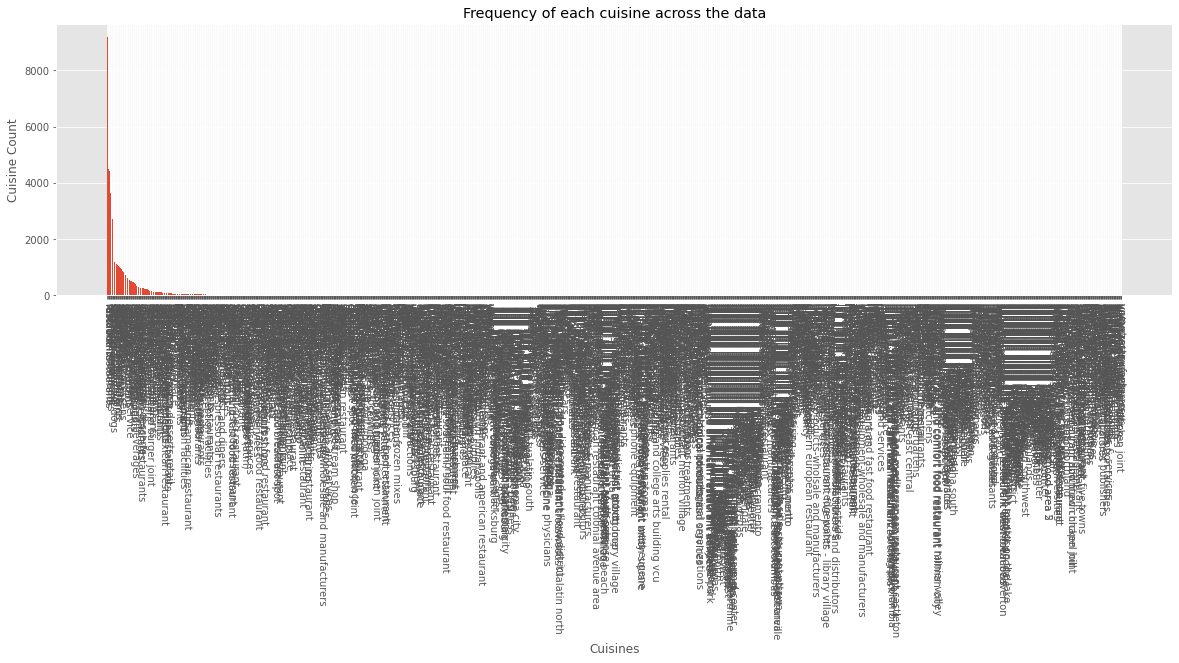

In [41]:
# sort the dictionay bye the key
cuisine_count = OrderedDict(sorted(cuisine_count.items(), key = lambda x : x[1], reverse=True))
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.bar(x=cuisine_count.keys(), height=cuisine_count.values())
plt.xlabel("Cuisines")
plt.ylabel("Cuisine Count")
plt.title("Frequency of each cuisine across the data")
plt.xticks(rotation=-90)
plt.show()

In [45]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()
#df2=df.plot[:5](kind='bar',figsize=(20,8),width=(0.4))

In [46]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')                                      # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]]          #keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [47]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [49]:
nRowsRead = 1000         #specify 'None' if want to read whole file
                        #Datafiniti_Fast_Food_Restaurants.csv has 10000 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/MyDrive/python/Datafiniti_Fast_Food_Restaurants_May19.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Datafiniti_Fast_Food_Restaurants.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 16 columns


In [52]:
df1.head(10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
5,AWrSaQ5RZ4Yw-wtdgcZw,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,1350 W Colfax Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Denver,US,us/co/denver/1350wcolfaxavenue/-1161002137,39.739670,-105.004670,McDonald's,80204,CO,https://www.yellowpages.com/denver-co/mip/mcdo...,https://www.mcdonalds.com/us/en-us/location/CO...
6,AWrSaQ4EsVYjT2BJAy_I,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,200 16th Street,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Denver,US,us/co/denver/20016thstreet/-1161002137,39.741700,-104.988290,McDonald's,80202,CO,https://www.yellowpages.com/denver-co/mip/mcdo...,https://www.mcdonalds.com/us/en-us/location/CO...
7,AWCvDUHSIxWefVJwvq4y,2018-01-01T00:01:02Z,2019-05-19T22:58:35Z,1772 N College Ave,"Restaurant,Carry-out food,Mexican Restaurants,...",Accommodation & Food Services,Fayetteville,US,us/ar/fayetteville/1772ncollegeave/-864103396,36.085369,-94.155319,Taco Bell,72703,AR,http://www.insiderpages.com/b/3709775090/taco-...,"http://www.tacobell.com/,http://www.tacobell.com"
8,AWrSTT3sQTFama1Xpjyq,2019-05-19T22:53:58Z,2019-05-19T22:53:58Z,605 S Havana Street,"Fast Food Restaurants,American Restaurants,Fam...",Accommodation & Food Services,Aurora,US,us/co/aurora/605shavanastreet/1077717834,39.705340,-104.866330,Captain D's Seafood Kitchen,80012,CO,https://www.yellowpages.com/denver-co/mip/capt...,http://www.captainds.com
9,AWkq412CIxWefVJwH_cO,2019-02-26T17:18:51Z,2019-05-19T22:51:18Z,16th Glenarm Place,"Mexican Restaurants,Caterers,Greek Restaurants...",Accommodation & Food Services,Denver,US,us/co/denver/16thglenarmplace/2067027233,39.749107,-104.994590,Shondiz,80202,CO,https://www.yellowpages.com/denver-co/mip/shon...,"http://www.shondiz.com,http://www.shondiz.com/"


In [50]:
#Let's take a quick look at what the data looks like:
df1.shape

(1000, 16)

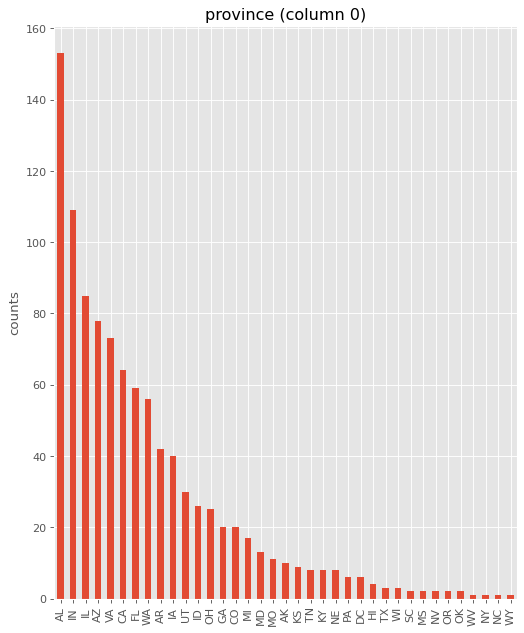

In [54]:
#Distribution graphs (histogram/bar graph) of sampled columns:
plotPerColumnDistribution(df1, 100, 10)

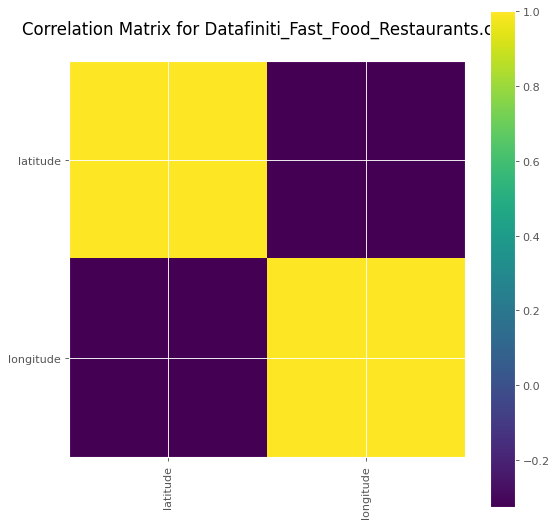

In [55]:
#Correlation matrix:
plotCorrelationMatrix(df1, 8)

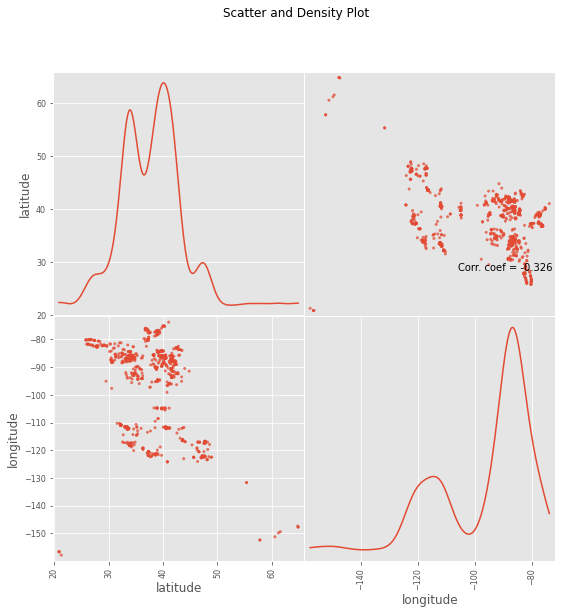

In [56]:
#Scatter and density plots:
plotScatterMatrix(df1, 9, 10)

In [22]:
df1=df.groupby('city')
df1.first()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
city,,,,,,,,,,,,,,,
Abbeville,AVweMIYa_7pvs4fzA0sj,2016-07-06T20:05:27Z,2019-03-21T08:16:55Z,644 Ozark Rd,"Delis And Delicatessens,Restaurant,Take Out Re...",Accommodation & Food Services,US,us/al/abbeville/644ozarkrd/-891525969,31.554300,-85.269000,SUBWAY,36310,AL,http://tripadvisor.com/Restaurant_Review-g2897...,http://www.subway.com/
Aberdeen,AWitvnrbIxWefVJwE_LU,2019-02-02T10:01:50Z,2019-04-18T22:11:41Z,1664 Nc Highway 5,"American Restaurants,Takeout,Burgers,Fast Food...",Accommodation & Food Services,US,us/nc/aberdeen/1664nchighway5/696490760,35.164600,-79.471695,Hardee's,28315,NC,https://www.dexknows.com/business_profiles/har...,http://hardees.com
Abilene,AVwdZLSx_7pvs4fz5a7N,2015-10-23T00:21:30Z,2019-04-15T07:08:49Z,4001 N 1st St,"Delis And Delicatessens,Sandwich Place and Fas...",Accommodation & Food Services,US,us/tx/abilene/4001n1stst/-891525969,32.452081,-99.771632,Subway,79603,TX,http://www.yellowbook.com/profile/subway_16314...,"http://www.subway.com/,http://subway.com/"
Abingdon,AVwdbK7WkufWRAb55w5n,2016-03-21T00:00:58Z,2019-04-07T15:23:59Z,401 Constant Friendship Blvd,"Delis And Delicatessens,Restaurant,Carry-out f...",Accommodation & Food Services,US,us/md/abingdon/401constantfriendshipblvd/-8915...,39.462716,-76.314980,Subway,21009,MD,http://www.citysearch.com/profile/43287708/abi...,http://www.subway.com/
Acworth,AVzA_qrd3D1zeR_xBDnQ,2017-06-19T15:35:34Z,2019-05-16T21:01:55Z,3295 Cobb Pkwy Nw,"Carry-out food,Caterers,American Restaurant,Am...",Accommodation & Food Services,US,us/ga/acworth/3295cobbpkwynw/-345832572,34.053500,-84.703800,Chick-Fil-A,30101,GA,http://www.yellowbook.com/profile/chick-fil-a_...,"http://www.chick-fil-a.com/,http://www.chick-f..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zanesville,AWlVTN8t3-Khe5l_5t2m,2019-03-06T18:50:03Z,2019-05-12T15:05:59Z,3217 Maple Avenue,"Mexican,Mexican Restaurants,Take-out,Lacto,Fas...",Accommodation & Food Services,US,us/oh/zanesville/3217mapleavenue/-1760681137,39.980740,-82.019050,Hot Head Burritos,43701,OH,https://www.yellowpages.com/zanesville-oh/mip/...,http://hotheadburritos.com
Zebulon,AWkq7ZGia4HuVbedks8n,2019-02-26T17:22:21Z,2019-03-02T09:00:27Z,7811 Highway 19 S,"Ice Cream and Frozen Desserts,Fast Food Restau...",Accommodation & Food Services,US,us/ga/zebulon/7811highway19s/-1914135427,33.095330,-84.344810,Dairy Queen Grill Chill,30295,GA,https://www.yellowpages.com/zebulon-ga/mip/dai...,https://www.dairyqueen.com/us-en/Locator/Detai...
Zelienople,AVwc__5ZIN2L1WUfrK_D,2016-10-23T21:50:48Z,2019-04-01T18:48:20Z,502 E Grandview Ave,"Pizza,Restaurant,Take Out Restaurants,Fast Foo...",Accommodation & Food Services,US,us/pa/zelienople/502egrandviewave/-1188936695,40.797900,-80.131900,Fox's Pizza Den,16063,PA,https://www.allmenus.com/pa/zelienople/67772-f...,http://www.foxspizzaden.com/


In [23]:
df3=df1.plot[:5](kind='bar',figsize=(20,8),width=(0.4))

TypeError: ignored

In [ ]:
n=df.nunique(axis=0)
n

In [ ]:
df['categories'].str.contains('Restaurant').sum()

In [ ]:
df['categories'].unique()


In [ ]:
df.columns

In [ ]:
df2=df.drop('country',axis=1)
df2

In [ ]:
categories1=df['categories'].tolist()
print(categories1)

In [ ]:
categories2=[x.lower() for x in categories1]
print(categories2)

In [ ]:
all_words = ' '.join([text for text in df['categories']])

In [ ]:
#all_words = ' '.join([text for text in 'categorie2'])

In [ ]:
 wordcloud = WordCloud(width=800,height=500,random_state=21,
                      max_font_size=1000).generate(all_words)
 plt.figure(figsize=(10,7))
 plt.imshow(wordcloud,interpolation="bilinear") 
 plt.axis('off')
 plt.show()

In [ ]:
df['categories']=df['categories'].apply(lambda x: x.lower())
df

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "Restaurant[\w]*")
df['categories']

In [ ]:
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "carry-out food[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "take out[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "restaurant[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "family style restaurant[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "delicatessens[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "caterers[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "karaoke [\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "food delivery[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "hotels and motels[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "hotel and motel reservations[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories'] = np.vectorize(remove_pattern)(df['categories'], "resorts[\w]*")
df['categories']